## Differential Equations in Time: A crash course

So, differential equations are equations involving a derivative.  They can be scalar problems like

$$
\frac{dy}{dt} = f(y,t), ~ y(t_{0}) = y_{0}
$$

or vector problems like

$$
\frac{d{\bf y}}{dt} = {\bf F}({\bf y},t), ~ {\bf y}(t_{0}) = {\bf y}_{0} \in \mathbb{R}^{n}.
$$

The condition $y(t_{0}) = y_{0}$ is called an _initial condition_.  

Some differential equations are easy to solve.  For example, if I ask you to solve 

$$
\frac{dy}{dt} = \lambda y, ~ y(t_{0}) = y_{0},
$$

we see almost by inspection that $y(t) = y_{0}e^{\lambda(t-t_{0})}$ solves the problem.  We can find this solution more systematically by seperating the equation.  In other words, we take 

$$
\frac{dy}{dt} = \lambda y,
$$

and turn it into 

$$
\frac{dy}{y} = \lambda dt.
$$

We then integrate both sides in the following way

$$
\int\frac{d y}{y} = \lambda\int dt.
$$

so that we find

$$
\ln\left|y(t)\right| = \lambda t + C,
$$

or 

$$
y(t) = \tilde{C}e^{\lambda t}, ~ \tilde{C} = e^{C}.
$$

Using the initial condition gives us $\tilde{C}=y_{0}e^{-\lambda t_{0}}$ and thus we have $y(t) = y_{0}e^{\lambda(t-t_{0})}$.

In general however, this trick does not work for very many differential equations of interest.  For example, the differential equation

$$
\frac{dy}{dt} = \cos(ty), ~ y(t_{0}) = y_{0},
$$

does not allow for separation between $y$ and $t$ since they are coupled inside the $\cos(ty)$ term.  

Thus, we turn to numerics.  Suppose I want a solution to the scalar initial-value problem 

$$
\frac{dy}{dt} = f(y,t), ~ y(t_{0}) = y_{0}
$$

for $t_{0}\leq t$.  I can then discretize the time so that I can try to interpolate my solution $y(t)$ at the discrete times $t_{j} = t_{0} + j\delta t$, $j=0,1,\cdots$.  Thus, if we work between the times $t_{n}$ and $t_{n+1} = t_{n} + \delta t$, we see that 

$$
\int_{t_{n}}^{t_{n+1}}\frac{dy}{dt}dt = \int_{t_{n}}^{t_{n+1}}f(y(t),t) dt,
$$

and so by integrating the left side and rearranging, we have that 

$$
y_{n+1} = y_{n} + \int_{t_{n}}^{t_{n+1}}f(y(t),t) dt,
$$

where $y_{n} = y(t_{n})$ and $y_{n+1} = y(t_{n+1})$.  Thus, by using different interpolatory approximations to the integral, we find different discretizations of the differential equation.  For example

* $f(y(t),t)\approx f(y_{n},t_{n})$ so $\int_{t_{n}}^{t_{n+1}}f(y(t),t) dt \approx \delta t f(y_{n},t_{n})$.

* $f(y(t),t)\approx f(y_{n+1},t_{n+1})$ so $\int_{t_{n}}^{t_{n+1}}f(y(t),t) dt \approx \delta t f(y_{n+1},t_{n+1})$.

* $f(y(t),t)\approx \frac{f(y_{n+1},t_{n+1})-f(y_{n},t_{n})}{\delta t}(t-t_{n}) + f(y_{n},t_{n})$, so $\int_{t_{n}}^{t_{n+1}}f(y(t),t) dt \approx \frac{\delta t}{2} \left( f(y_{n+1},t_{n+1}) + f(y_{n},t_{n})\right)$.

We then get the following methods for numerically solving the differential equation

* Foward Euler's Method: $y_{n+1} = y_{n} + \delta t f(y_{n},t_{n})$.
* Backward Euler's Method: $y_{n+1} = y_{n} + \delta t f(y_{n+1},t_{n+1})$.
* Trapezoid Method: $y_{n+1} = y_{n} + \frac{\delta t}{2}\left(f(y_{n},t_{n}) + f(y_{n+1},t_{n+1})\right)$.

The first method is called _explicit_ since we can find $y_{n+1}$ in terms of $y_{n}$ directly, whereas the next two methods are called _implicit_ since we have to solve for $y_{n+1}$ at each time step in order to move the method forward.  Thus, the implicit methods need a root finder in order to work in general.  See the code below for implementations of both Forward and Backward Euler in order to solve 

$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10,
$$

for $0\leq t \leq 10$.

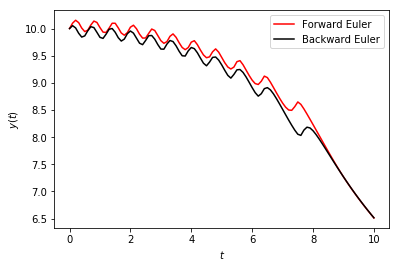

In [115]:
def forward_euler(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = ysol[jj-1] + dt*f(times[jj-1],ysol[jj-1])
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

def backward_euler(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        floc = lambda y: (y-ysol[jj-1])-dt*f(times[jj],y)
        ysol[jj] = secant_method(floc,ysol[jj-1]/2.,ysol[jj-1],1e-6) # Note, we need a root finder for the implicit scheme.
    return np.array([times,ysol])

myf = lambda t,y: np.cos(t*y)
t0 = 0.
tf = 10.
y0 = 10.

dt = .1
feuler_sol = forward_euler(myf,dt,t0,tf,y0)
beuler_sol = backward_euler(myf,dt,t0,tf,y0)

plt.plot(feuler_sol[0][:],feuler_sol[1][:],color='r',label="Forward Euler")
plt.plot(beuler_sol[0][:],beuler_sol[1][:],color='k',label="Backward Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc='best')

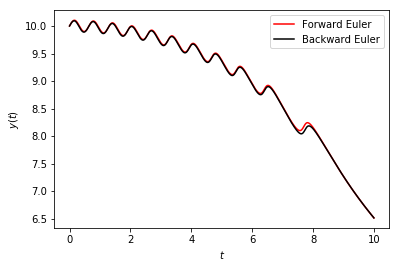

In [116]:
dt = .01
feuler_sol = forward_euler(myf,dt,t0,tf,y0)
beuler_sol = backward_euler(myf,dt,t0,tf,y0)

plt.plot(feuler_sol[0][:],feuler_sol[1][:],color='r',label="Forward Euler")
plt.plot(beuler_sol[0][:],beuler_sol[1][:],color='k',label="Backward Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc='best')

Looking at our examples then, we see that we get markedly different results when we choose $\delta t = .01$ vs $\delta t = .1$.  Overall, we see that the change in the Forward Euler method is far more dramatic as we decrease the step size than for the Backward Euler method.  Thus, while the Backward Euler method is more computationally intensive since we need to use a root finder to update the method at each time step, we also can get away with using a much larger time step.   

**Problem 1**: 10pts

1a) Implement the Trapezoid method and then compare the results from the Forward Euler, Backward Euler, and Trapezoid Method for the test problem
$$
\frac{dy}{dt} = \lambda y, ~ y(0) = 1, ~ 0\leq t \leq 1.
$$
Develop test cases for $\lambda < 0$ and $\lambda >0$.  Using the exact solution described above, determine the order of error of each method.  Describe the behavior of the solutions and their accuracy as you vary $\delta t$ in the different methods.  Note, for this problem, we see that we do not need a root finder for the implicit schemes since 

Backward Euler: $y_{n+1} = y_{n}+\delta t \lambda y_{n+1}$ so $y_{n+1} = \frac{y_{n}}{1-\lambda \delta t} = \left(\frac{1}{1-\lambda \delta t} \right)^{n+1}y_{0}$

Trapezoid: $y_{n+1} = y_{n}+\frac{\lambda\delta t}{2} \left(y_{n+1}+y_{n}\right)$ so $y_{n+1} = \frac{1+\lambda \delta t/2}{1-\lambda \delta t/2}y_{n} = \left(\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right)^{n+1}y_{0}$.

1b) For the differential equation 
$$
\frac{dy}{dt} = \cos(y), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
find an exact solution using the fact that the problem is seperable. Then solve it using the Trapezoid Method.  Again, determine the order of error of the method and comment on how the numerical solution changes with step size $\delta t$. 

1c) For the differential equation
$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
solve it using the Trapezoid method.  How does your solution compare in behavior to that you found in $2b$?  Explore several choices of step size $\delta t$ and determine the relative strengths and weaknesses of all three different approaches. In particular, which method allows for the largest time step $\delta t$ such that you get believable results?



**Problem 2** 10pts

The Van der pol oscillator equation is given by

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

a) Write a function called `van_der_pol` which takes parameters `mu`, `u0` and `t` and returns a 2D NumPy array of size `(len(t),2)` with $x$ values in the first column and $x'$ values in the second column for the solution with initial values `u0 = [x(0),x'(0)]`.

b) Plot $x$ versus $x'$ for the solution with $\mu = 1$, $x(0) = 1$ and $x'(0)=4$.

c) Plot $x$ versus $x'$ for $x(0) = 1$ and $x'(0)=4$ for each value $\mu = 1,2,3,4$. If you are on the right track, you will have the following onee.

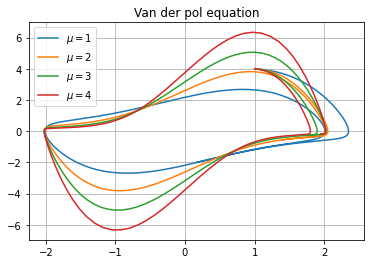